# Mobile Sensory Data

## 1- Background

Mobile sensory data enables the research and development of algorithms and solutions to many problems. The dataset provided here contains data from 60 users (also referred to as subjects or participants), each identified with a universally unique identifier (UUID). From every user, it has thousands of examples, typically taken in intervals of 1 minute (but not necessarily in one long sequence, as there are time gaps). Every example contains measurements from sensors (from the user's personal smartphone and from a smartwatch that we provided). Most examples also have context labels self-reported by the user.


## 2- Project Goal
Conduct exploratory analysis and build a machine learning model

## 3- Description of solution plan

**I) Data Accessement**

**II) Clean Mobile Sensory Dataset**

**III) Conduct Data Exploratory Analysis**

**IV) Build Machine Learning Model**

### I) Data Accessment

In [1]:
# Loading Packages
import pandas as pd
import numpy as np
import os
from glob import glob
import seaborn as sn
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

#### Loading and Merging All Users Datasets 

In [2]:
file_names = glob('input/*.csv.gz')
dataframes = [pd.read_csv(f) for f in file_names]
len(dataframes)

60

In [3]:
# Converting into a dataframe
data_final = pd.concat(dataframes)
data_final

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
4,1444079431,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,...,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,1444234779,1.007886,0.009355,0.012618,0.030905,1.005121,1.008012,1.010024,0.423861,6.684569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4969,1444234839,1.000400,0.009068,-0.019631,0.032762,0.998186,1.001128,1.003113,0.768680,6.684569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4970,1444234899,1.026223,0.195112,0.255240,0.379733,0.983684,1.000173,1.030232,1.484173,6.668006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4971,1444234959,1.123513,0.273450,0.312818,0.480787,0.966631,1.051232,1.229708,1.808524,6.656521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [4]:
def data_understanding(data):
    """Function that prints all data information
        
    Args:
        data: data to be understood - dataframe
    
    Return:
        None: Prints summary info to the screen
    """
    # checking the data shape
    print('Data Shape')
    print('---------------------------------')
    print(data.shape)
    print('---------------------------------\n\n')
    
    # displaying the columns
    print('Data Columns')
    print('---------------------------------')
    print(data.columns.values)
    print('---------------------------------\n\n')
    
    # checking data info
    print('Data Info')
    print('---------------------------------')
    print(data.info())
    print('---------------------------------\n\n')

In [5]:
data_understanding(data_final)

Data Shape
---------------------------------
(377346, 278)
---------------------------------


Data Columns
---------------------------------
['timestamp' 'raw_acc:magnitude_stats:mean' 'raw_acc:magnitude_stats:std'
 'raw_acc:magnitude_stats:moment3' 'raw_acc:magnitude_stats:moment4'
 'raw_acc:magnitude_stats:percentile25'
 'raw_acc:magnitude_stats:percentile50'
 'raw_acc:magnitude_stats:percentile75'
 'raw_acc:magnitude_stats:value_entropy'
 'raw_acc:magnitude_stats:time_entropy'
 'raw_acc:magnitude_spectrum:log_energy_band0'
 'raw_acc:magnitude_spectrum:log_energy_band1'
 'raw_acc:magnitude_spectrum:log_energy_band2'
 'raw_acc:magnitude_spectrum:log_energy_band3'
 'raw_acc:magnitude_spectrum:log_energy_band4'
 'raw_acc:magnitude_spectrum:spectral_entropy'
 'raw_acc:magnitude_autocorrelation:period'
 'raw_acc:magnitude_autocorrelation:normalized_ac' 'raw_acc:3d:mean_x'
 'raw_acc:3d:mean_y' 'raw_acc:3d:mean_z' 'raw_acc:3d:std_x'
 'raw_acc:3d:std_y' 'raw_acc:3d:std_z' 'raw_acc:3d:ro_xy'

The dataframe has 377346 rows and 278 columns

In [6]:
def getLabels(dataframe):
    """Function that gets all the labels from the dataset
        
    Args:
        dataframe: loaded dataframe
    
    Return:
        labels: array of labels
    """
    columns = dataframe.columns
    for (i,col) in enumerate(columns):
        if col.startswith('label:'):
            first_label_indice = i;
            break;
        pass; 
    label_names = columns[first_label_indice:-1];
    label_names = np.array(label_names)
    return label_names


In [7]:
getLabels(data_final)

array(['label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking',
       'label:FIX_running', 'label:BICYCLING', 'label:SLEEPING',
       'label:LAB_WORK', 'label:IN_CLASS', 'label:IN_A_MEETING',
       'label:LOC_main_workplace', 'label:OR_indoors', 'label:OR_outside',
       'label:IN_A_CAR', 'label:ON_A_BUS', 'label:DRIVE_-_I_M_THE_DRIVER',
       'label:DRIVE_-_I_M_A_PASSENGER', 'label:LOC_home',
       'label:FIX_restaurant', 'label:PHONE_IN_POCKET',
       'label:OR_exercise', 'label:COOKING', 'label:SHOPPING',
       'label:STROLLING', 'label:DRINKING__ALCOHOL_',
       'label:BATHING_-_SHOWER', 'label:CLEANING', 'label:DOING_LAUNDRY',
       'label:WASHING_DISHES', 'label:WATCHING_TV',
       'label:SURFING_THE_INTERNET', 'label:AT_A_PARTY', 'label:AT_A_BAR',
       'label:LOC_beach', 'label:SINGING', 'label:TALKING',
       'label:COMPUTER_WORK', 'label:EATING', 'label:TOILET',
       'label:GROOMING', 'label:DRESSING', 'label:AT_THE_GYM',
       'label:STAIRS_-_GOING_UP', 'lab

In [8]:
len(getLabels(data_final))

51

In [9]:
def getFeatures(dataframe):
    """Function that gets all the features from the dataset
        
    Args:
        dataframe: loaded dataframe
    
    Return:
        labels: array of features
    """
    columns = dataframe.columns
    for (i,col) in enumerate(columns):
        if col.startswith('label:'):
            last_features_indice = i;
            break;
        pass; 
    feature_names = columns[1:last_features_indice];
    return np.array(feature_names)


In [10]:
getFeatures(data_final)

array(['raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std',
       'raw_acc:magnitude_stats:moment3',
       'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       'raw_acc:magnitude_spectrum:log_energy_band0',
       'raw_acc:magnitude_spectrum:log_energy_band1',
       'raw_acc:magnitude_spectrum:log_energy_band2',
       'raw_acc:magnitude_spectrum:log_energy_band3',
       'raw_acc:magnitude_spectrum:log_energy_band4',
       'raw_acc:magnitude_spectrum:spectral_entropy',
       'raw_acc:magnitude_autocorrelation:period',
       'raw_acc:magnitude_autocorrelation:normalized_ac',
       'raw_acc:3d:mean_x', 'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z',
       'raw_acc:3d:std_x', 'raw_acc:3d:std_y', 'raw_acc:3d:std_z',
       'raw_acc:3d:ro_xy', 'raw_acc:3d:r

In [11]:
len(getFeatures(data_final))

225

The dataset contains 226 features and 51 labels

In [12]:
def missing_data(dataframe):
    """Function that checks for null values and computes the percentage of null values
    Args:
        data: loaded dataframe
    Return:
        dataframe: dataframe of total null values with corresponding percentages
    """
    #columns with percentage missing values
    total = dataframe.isnull().sum().sort_values(ascending=False)   # create an empty datafram
    percentage = round((total / dataframe.shape[0]) * 100, 2)
    
    Percentage_Dframe = pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])
    return Percentage_Dframe

In [13]:
# checking null values 
print(data_final.isnull().any())
print("'---------------------------------\n")
# Columns with missing values
miss_col = data_final.isnull().sum()
# Total missing values
Total_missing = miss_col.sum()
# total cells in the dataset
total_cells = np.product(data_final.shape)  
# percentage missing values in the dataset
percent = (Total_missing/total_cells)*100
print("The percentage of missing data in the dataset is","%.3f%%" %(percent))
print("'---------------------------------\n")

timestamp                          False
raw_acc:magnitude_stats:mean        True
raw_acc:magnitude_stats:std         True
raw_acc:magnitude_stats:moment3     True
raw_acc:magnitude_stats:moment4     True
                                   ...  
label:PHONE_IN_BAG                  True
label:PHONE_ON_TABLE                True
label:WITH_CO-WORKERS               True
label:WITH_FRIENDS                  True
label_source                       False
Length: 278, dtype: bool
'---------------------------------

The percentage of missing data in the dataset is 22.928%
'---------------------------------



In [14]:
missing_data(data_final)

,Total,Percentage
label:SINGING,352229,93.34
lf_measurements:relative_humidity,351407,93.13
lf_measurements:temperature_ambient,350896,92.99
label:AT_A_BAR,344126,91.20
label:AT_THE_GYM,332953,88.24
...,...,...
discrete:ringer_mode:missing,0,0.00
discrete:ringer_mode:is_silent_with_vibrate,0,0.00
discrete:ringer_mode:is_silent_no_vibrate,0,0.00
discrete:ringer_mode:is_normal,0,0.00


In [15]:
def unique_value(dataframe):
    """Function that checks for unique values in each column
    Args:
        data: loaded dataframe
    Return:
        int: number of columns with single values 
    """
    counts = dataframe.nunique()
    unique_col = [dataframe.columns[i] for i,v in enumerate(counts) if v==1]
    return unique_col

In [16]:
unique_value(data_final)

['discrete:battery_plugged:is_wireless',
 'discrete:battery_state:is_unknown',
 'discrete:wifi_status:is_reachable_via_wwan',
 'lf_measurements:proximity']

In [17]:
def duplicated_value(data):
    """Function that checks for duplicate values in rows
    Args:
        data: loaded dataframe
    Return:
        int: Return number of duplicate
    """
    print(data.duplicated().any())
    return data.duplicated().sum()

In [18]:
duplicated_value(data_final)

False


0

In [19]:
def outliers(dataframe):
    """
    Function that get outliers from the dataframe

    Args:
        data : pandas dataframe
            Contains the data where the outliers are to be found
    Returns:
        None: prints number of outliers
    """
    outliers = []
    for c in dataframe.columns:
        q25, q75 = np.percentile(dataframe[c], 25), np.percentile(dataframe[c], 75)
        iqr = q75 - q25
        print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))

        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # identify outliers
        indx = np.where((dataframe[c] < lower) | (dataframe[c] > upper))
        print(c,'----------> Identified outliers: %d' % len(indx[0]))
        if len(indx[0])>0:
            outliers.append(c)
    print("**************************************")
    print("**************************************")
    print(len(outliers),"columns have outliers")

In [20]:
outliers(data_final)

Percentiles: 25th = 1441438189.500, 75th = 1448696048.500, IQR = 7257859.000
timestamp ----------> Identified outliers: 22865
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:mean ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:moment3 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:moment4 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:percentile25 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:percentile50 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:percentile75 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_sta

Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:mean_y ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:mean_z ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:std_x ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:std_y ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:std_z ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:ro_xy ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:ro_xz ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:ro_yz ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:spectrum:x_log_energy_band0 ----------> Identified o

Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc5:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc6:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc7:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc8:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc9:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc10:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc11:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc12:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_properties:max_abs_value ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio

Percentiles: 25th = nan, 75th = nan, IQR = nan
label:WITH_FRIENDS ----------> Identified outliers: 0
Percentiles: 25th = 2.000, 75th = 2.000, IQR = 0.000
label_source ----------> Identified outliers: 114266
**************************************
**************************************
23 columns have outliers


After checking the dataset quality, it has 22.928% of missing data, 4 columns with unque values, 0 duplicates and 23 columns have outliers

### III) Data Cleaning and Processing

#### dropping some columns

In [21]:
# getting index of some columns
print(data_final.columns.get_loc('discrete:app_state:is_active'))
print(data_final.columns.get_loc('lf_measurements:temperature_ambient'))

184
217


In [22]:
data_final.drop(data_final.iloc[:, 184:217], inplace=True, axis=1)

In [23]:
missing_values = missing_data(data_final)
missing_values[missing_values['Percentage']>80]

,Total,Percentage
label:SINGING,352229,93.34
lf_measurements:temperature_ambient,350896,92.99
label:AT_A_BAR,344126,91.20
label:AT_THE_GYM,332953,88.24
label:LAB_WORK,327951,86.91
label:STROLLING,323585,85.75
label:AT_A_PARTY,322783,85.54
label:LOC_beach,319702,84.72
label:DRINKING__ALCOHOL_,306563,81.24
label:ELEVATOR,306150,81.13


In [24]:
# dropping columns that have more than 80 percent of missing values
data_final.drop(columns=['label:SINGING', 'lf_measurements:temperature_ambient','label:AT_A_BAR','label:AT_THE_GYM','label:LAB_WORK','label:STROLLING',
                        'label:AT_A_PARTY','label:LOC_beach','label:DRINKING__ALCOHOL_','label:ELEVATOR','label:DOING_LAUNDRY','label_source'],inplace=True, axis=1)

In [25]:
# remove outliers
indx = outliers(data_final)
data_final.drop(data_final.iloc[indx].index, inplace=True)
print('Non-outlier observations: %d' % len(data_final))

Percentiles: 25th = 1441438189.500, 75th = 1448696048.500, IQR = 7257859.000
timestamp ----------> Identified outliers: 22865
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:mean ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:moment3 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:moment4 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:percentile25 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:percentile50 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_stats:percentile75 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
raw_acc:magnitude_sta

Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:magnitude_spectrum:log_energy_band4 ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:magnitude_spectrum:spectral_entropy ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:magnitude_autocorrelation:period ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:magnitude_autocorrelation:normalized_ac ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:mean_x ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:mean_y ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:mean_z ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
watch_acceleration:3d:std_x ----------> Identified outliers: 0
Percenti

Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc0:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc1:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc2:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc3:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc4:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc5:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc6:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc7:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc8:std ----------> Identified outliers: 0
Percentiles: 25th = nan, 75th = nan, IQR = nan
audio_naive:mfcc9

TypeError: Cannot index by location index with a non-integer key

In [26]:
data_final.shape

(377346, 233)

In [27]:
import datetime
import pytz
def get_actual_date_labels(t_seconds):
    """Function that gets recording dates
        
    Args:
        t_seconds: time in second
    
    Return:
        datetime: list of date and time
    """
    time_zone = pytz.timezone('US/Pacific'); # Assuming the data comes from PST time zone
    weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'];
    datetime_list = [];
    for timestamp in t_seconds:
        t_datetime = datetime.datetime.fromtimestamp(timestamp,tz=time_zone);
        weekdays_str = weekdays[t_datetime.weekday()];
        time_of_day = t_datetime.strftime('%I:%M%p');
        datetime_list.append(weekdays_str+' '+time_of_day);
        pass;
    
    return datetime_list;

In [28]:
# changing the timesamp column into datetime
data_final['timestamp'] = get_actual_date_labels(data_final['timestamp'])
data_final

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:DRESSING,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,Mon 02:06PM,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
1,Mon 02:07PM,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
2,Mon 02:08PM,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
3,Mon 02:09PM,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
4,Mon 02:10PM,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,Wed 09:19AM,1.007886,0.009355,0.012618,0.030905,1.005121,1.008012,1.010024,0.423861,6.684569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4969,Wed 09:20AM,1.000400,0.009068,-0.019631,0.032762,0.998186,1.001128,1.003113,0.768680,6.684569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4970,Wed 09:21AM,1.026223,0.195112,0.255240,0.379733,0.983684,1.000173,1.030232,1.484173,6.668006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4971,Wed 09:22AM,1.123513,0.273450,0.312818,0.480787,0.966631,1.051232,1.229708,1.808524,6.656521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IV- Data Exploration

We are going to display the labels columns with the time spent on each by the users

In [29]:
labels = getLabels(data_final)
labels_dataframe = data_final[labels]
total_time = np.sum(labels_dataframe,axis=0);
total_time

label:LYING_DOWN                 104210.0
label:SITTING                    136356.0
label:FIX_walking                 22136.0
label:FIX_running                  1090.0
label:BICYCLING                    5020.0
label:SLEEPING                    83055.0
label:IN_CLASS                     6110.0
label:IN_A_MEETING                 5153.0
label:LOC_main_workplace          33944.0
label:OR_indoors                 184692.0
label:OR_outside                  12114.0
label:IN_A_CAR                     6083.0
label:ON_A_BUS                     1794.0
label:DRIVE_-_I_M_THE_DRIVER       7975.0
label:DRIVE_-_I_M_A_PASSENGER      2526.0
label:LOC_home                   152892.0
label:FIX_restaurant               2098.0
label:PHONE_IN_POCKET             23401.0
label:OR_exercise                  8081.0
label:COOKING                      4029.0
label:SHOPPING                     1841.0
label:BATHING_-_SHOWER             2087.0
label:CLEANING                     3806.0
label:WASHING_DISHES              

In [30]:
# sorted labels counts
counts = zip(labels,total_time)
sorted_counts = sorted(counts,reverse=True,key=lambda pair:pair[1])
sorted_counts
for (label,count) in sorted_counts:
    print("%s - %d minutes" % (label,count))

label:OR_indoors - 184692 minutes
label:LOC_home - 152892 minutes
label:SITTING - 136356 minutes
label:PHONE_ON_TABLE - 115037 minutes
label:LYING_DOWN - 104210 minutes
label:SLEEPING - 83055 minutes
label:AT_SCHOOL - 42331 minutes
label:COMPUTER_WORK - 38081 minutes
label:OR_standing - 37782 minutes
label:TALKING - 36293 minutes
label:LOC_main_workplace - 33944 minutes
label:PHONE_IN_POCKET - 23401 minutes
label:FIX_walking - 22136 minutes
label:SURFING_THE_INTERNET - 19416 minutes
label:EATING - 16594 minutes
label:PHONE_IN_HAND - 14573 minutes
label:WATCHING_TV - 13311 minutes
label:OR_outside - 12114 minutes
label:PHONE_IN_BAG - 10201 minutes
label:OR_exercise - 8081 minutes
label:DRIVE_-_I_M_THE_DRIVER - 7975 minutes
label:WITH_CO-WORKERS - 6224 minutes
label:IN_CLASS - 6110 minutes
label:IN_A_CAR - 6083 minutes
label:IN_A_MEETING - 5153 minutes
label:BICYCLING - 5020 minutes
label:COOKING - 4029 minutes
label:CLEANING - 3806 minutes
label:GROOMING - 3064 minutes
label:TOILET - 26

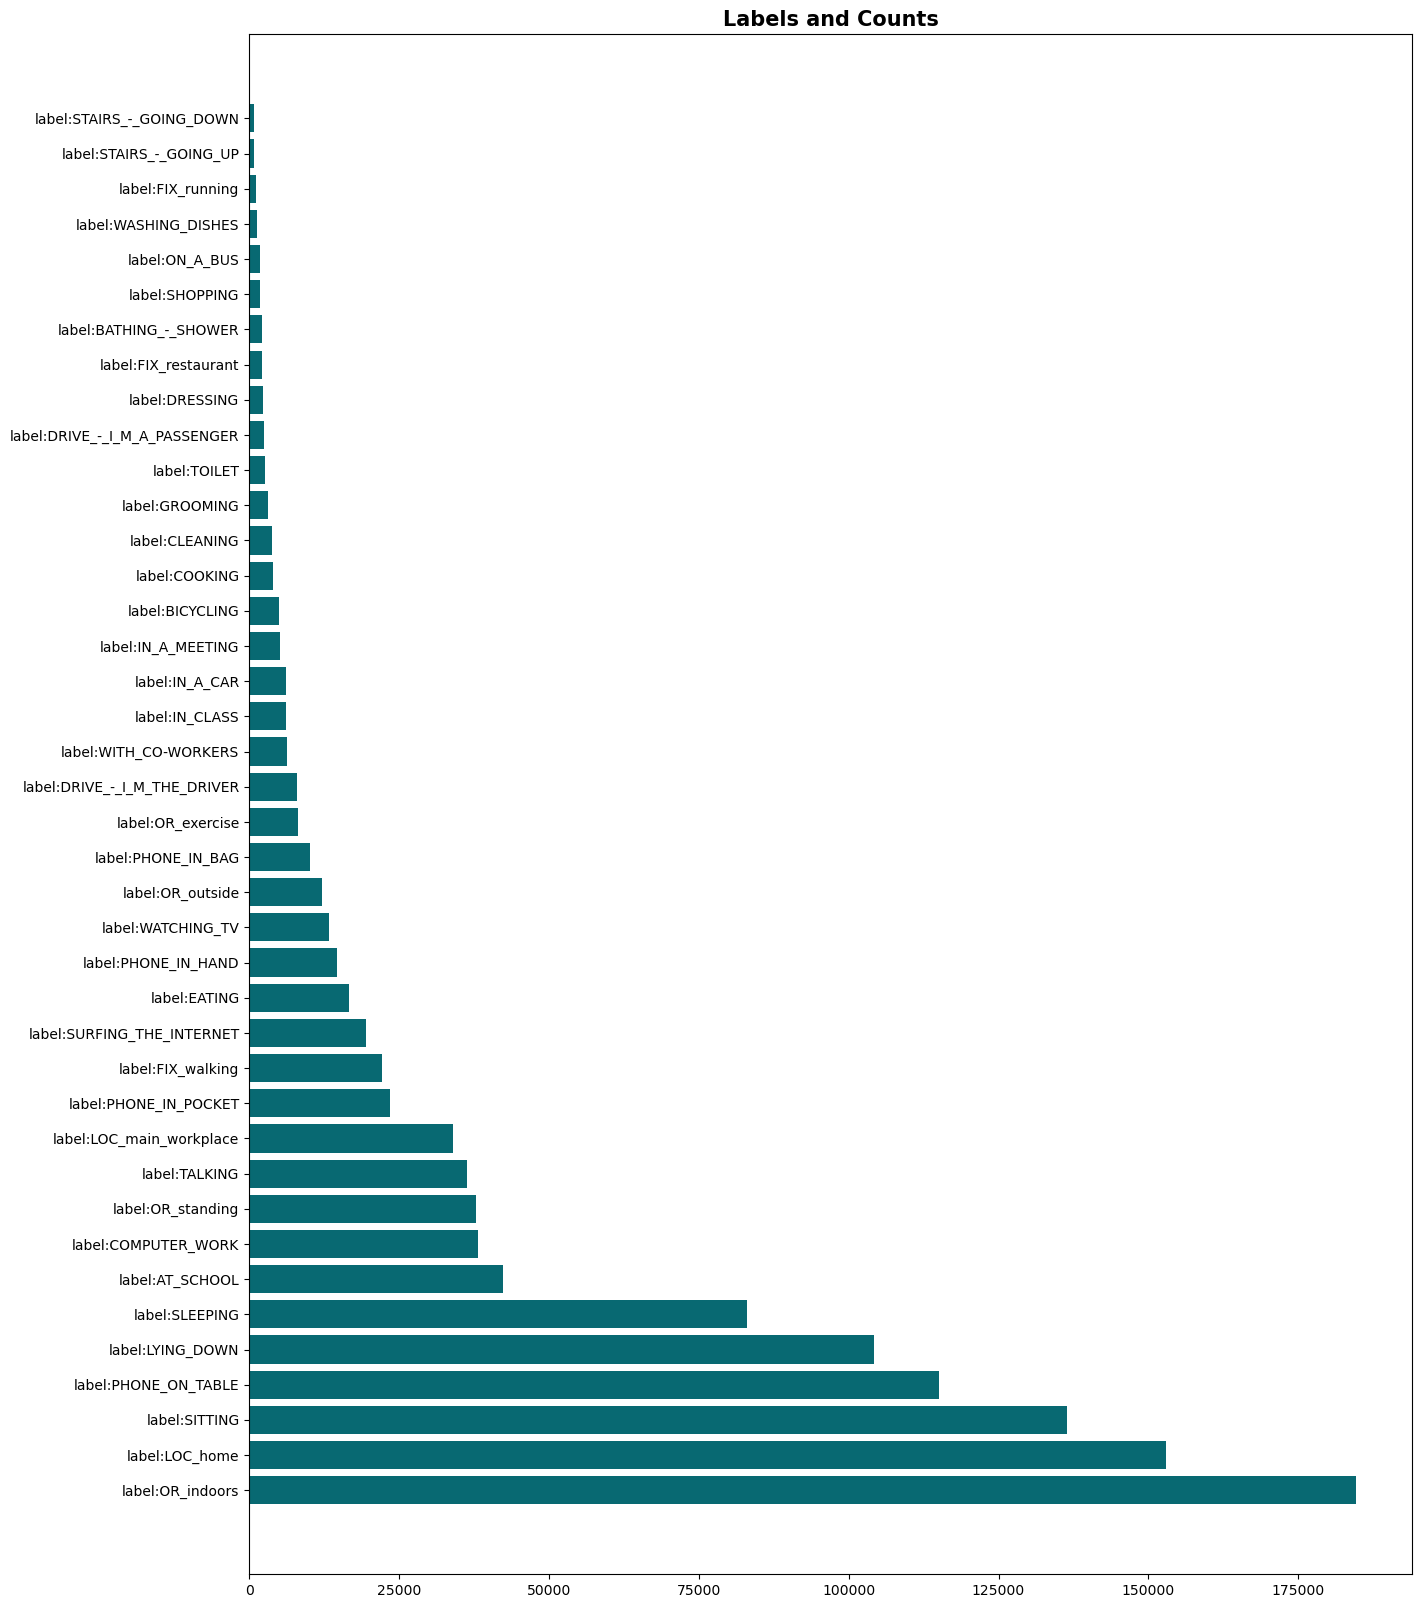

In [31]:
plt.figure(figsize=(15,20),dpi=100)
for (label,count) in sorted_counts:
    plt.barh(label,count,color='#086972')
    plt.title('Labels and Counts',fontdict={'fontweight':'bold','fontsize':15})

The label with the highest recorded time is indoors **184692 minutes**, followed by location_home **152892 minutes**, sitting **136356 minutes** and phone on table **115037 minutes**. the two labels with the lowest time spent are Stairs_going_up **798 minutes** and Stairs_going_down **774 minutes**

Let's explore the labels based on the week days

In [32]:
# split timesamp column into days and time
data_final[["days", "time"]] = data_final["timestamp"].str.split(" ", expand=True)
# group by days
days_data = data_final.groupby(["days"]).count()
days_data 

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,time
days,,,,,,,,,,,,,,,,,,,,,
Fri,58774,58723,58723,58723,58723,58723,58723,58723,58723,58723,...,13337,13806,47305,39947,22024,14252,26200,18032,25633,58774
Mon,46590,46563,46563,46563,46563,46563,46563,46563,46563,46563,...,11141,9765,38419,32146,18464,15151,21671,15202,20615,46590
Sat,45129,45077,45077,45077,45077,45077,45077,45077,45077,45077,...,8704,8806,35461,31042,18343,11451,20832,11789,19484,45129
Sun,43420,43383,43383,43383,43383,43383,43383,43383,43383,43383,...,9876,9393,33991,29227,16838,12865,18400,11100,18946,43420
Thu,65440,65416,65416,65416,65416,65416,65416,65416,65416,65416,...,16654,17768,53726,44626,24137,15033,27868,19967,28578,65440
Tue,55783,55746,55746,55746,55746,55746,55746,55746,55746,55746,...,16544,16623,46085,38228,19712,11720,22852,18403,25220,55783
Wed,62210,62148,62148,62148,62148,62148,62148,62148,62148,62148,...,18373,18254,51607,43948,22185,11990,24600,17571,26938,62210


<AxesSubplot:title={'center':'Body Status Labels'}, xlabel='days'>

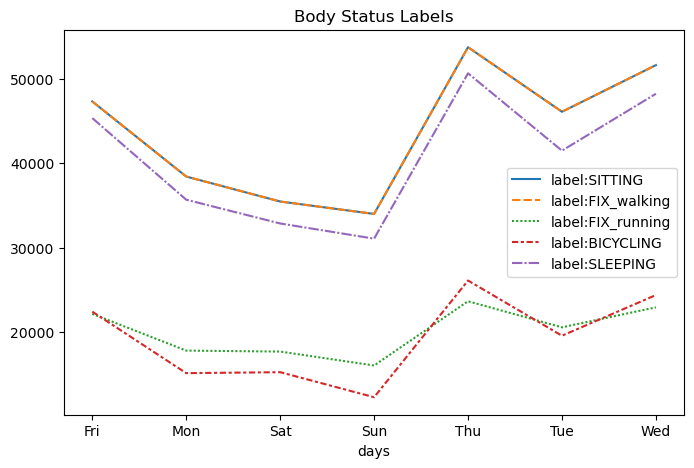

In [33]:
plt.figure(figsize = (8,5))
lab = ['label:SITTING','label:FIX_walking','label:FIX_running','label:BICYCLING','label:SLEEPING']
# title
plt.title("Body Status Labels")
sn.lineplot(data = days_data[lab])

Body status  like sitting, sleeping and walking recorded time are higher than body status like running and bicycling. but for all these body status, they get their highest points on Thursday and lowest on sunday

<AxesSubplot:title={'center':'Location Status Labels'}, xlabel='days'>

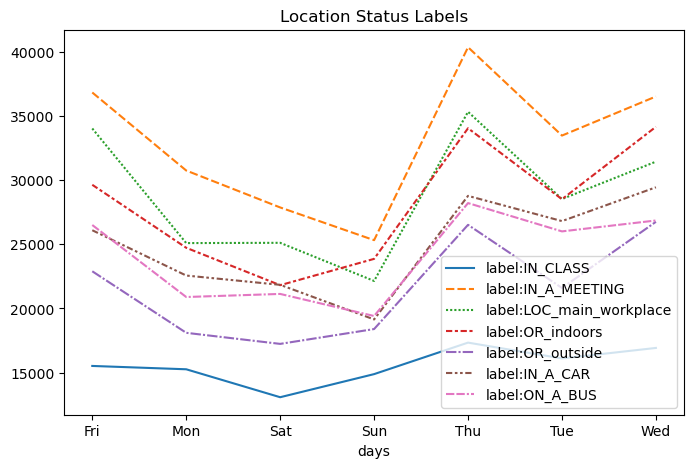

In [34]:
plt.figure(figsize = (8,5))
lab = ['label:IN_CLASS','label:IN_A_MEETING','label:LOC_main_workplace','label:OR_indoors','label:OR_outside','label:IN_A_CAR','label:ON_A_BUS']
# title
plt.title("Location Status Labels")
sn.lineplot(data = days_data[lab])

Location status like in meeting, indoors and workplace recorded time are the highest. they get their highest ponts on thursday and lowest on sunday and tuesday

<AxesSubplot:title={'center':'Phone Status Labels'}, xlabel='days'>

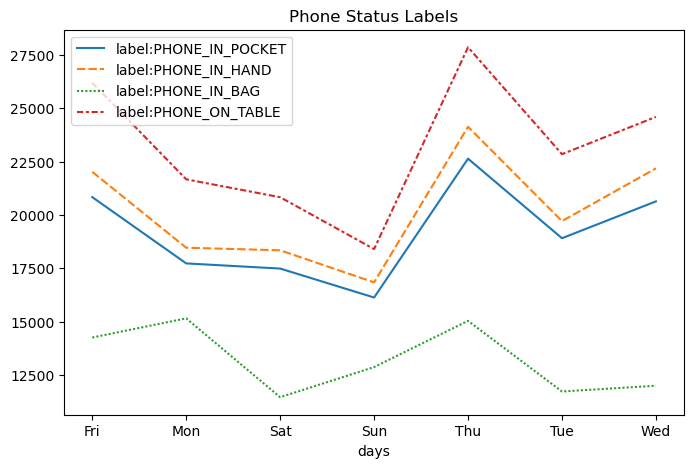

In [35]:
plt.figure(figsize = (8,5))
lab = ['label:PHONE_IN_POCKET','label:PHONE_IN_HAND','label:PHONE_IN_BAG','label:PHONE_ON_TABLE']
# title
plt.title("Phone Status Labels")
sn.lineplot(data = days_data[lab])

Phone status like on table and in hand recorded time are the highest and they get their high point on thursday and low pont on sunday

Let's get combination of labels that are common

In [36]:
Y = data_final[labels]
corr = Y[labels].corr()
corr
corr.dropna(how='all').style.background_gradient(cmap='coolwarm', axis=None)

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:BATHING_-_SHOWER,label:CLEANING,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS
label:LYING_DOWN,1.000000,-0.644035,-0.200473,-0.061715,-0.149215,0.849026,-0.173984,-0.110020,-0.320202,0.247623,-0.267511,-0.133555,-0.070861,-0.165944,-0.101200,0.446101,-0.079845,-0.293911,-0.123196,-0.104460,-0.079460,-0.074459,-0.117364,-0.066982,-0.091420,-0.150219,-0.249300,-0.298180,-0.158212,-0.078124,-0.091957,-0.075824,-0.063532,-0.062132,-0.270874,-0.303907,-0.105083,-0.193742,0.341163,-0.163903
label:SITTING,-0.644035,1.000000,-0.249660,-0.079839,-0.161362,-0.537308,0.237669,0.131182,0.259970,0.060270,-0.076760,0.193104,0.094544,0.238699,0.155973,-0.248191,0.092567,-0.047077,-0.158739,-0.105006,-0.085198,-0.089658,-0.117829,-0.081446,0.185706,0.242800,0.112048,0.422546,0.200406,0.008665,-0.086969,-0.081601,-0.081084,-0.077657,-0.335527,0.265191,-0.004895,0.042734,0.025191,0.126642
label:FIX_walking,-0.200473,-0.249660,1.000000,-0.024751,-0.048394,-0.174910,-0.065651,-0.034536,-0.052590,-0.567505,0.593083,-0.055508,-0.031867,-0.055321,-0.036482,-0.190338,-0.022367,0.338124,-0.041480,0.031541,0.270976,-0.010017,0.076936,-0.018006,-0.072228,-0.070636,0.111559,-0.118176,-0.053345,-0.014834,-0.018418,-0.010827,0.214297,0.205316,-0.104582,0.063083,0.134616,0.172154,-0.381414,0.051279
label:FIX_running,-0.061715,-0.079839,-0.024751,1.000000,-0.026772,-0.046576,-0.015598,-0.013122,-0.033671,-0.125577,0.130799,-0.013332,-0.007173,-0.016364,-0.012403,-0.067557,-0.008608,-0.007414,0.512805,-0.012138,-0.007082,-0.008090,-0.014355,-0.007180,-0.025752,-0.030532,0.025471,-0.031327,-0.017917,-0.009530,-0.009416,-0.008539,0.072770,0.041828,-0.033366,-0.006957,0.042250,0.012381,-0.023693,-0.019900
label:BICYCLING,-0.149215,-0.161362,-0.048394,-0.026772,1.000000,-0.137838,-0.048698,-0.028233,-0.082921,-0.424607,0.425290,-0.040912,-0.014467,-0.045129,-0.016974,-0.156071,-0.019655,0.180512,0.857971,-0.020810,-0.022641,-0.016735,-0.025253,-0.014130,-0.051299,-0.062768,0.081213,-0.084258,-0.041576,-0.019024,-0.020252,-0.018612,-0.009759,-0.008524,-0.077815,-0.033065,-0.027551,0.170451,-0.204572,-0.039708
label:SLEEPING,0.849026,-0.537308,-0.174910,-0.046576,-0.137838,1.000000,-0.147159,-0.101193,-0.288053,0.219199,-0.237858,-0.121346,-0.060386,-0.153607,-0.087964,0.383691,-0.071885,-0.274936,-0.118923,-0.084553,-0.071789,-0.066814,-0.102642,-0.059191,-0.174603,-0.198077,-0.221564,-0.280666,-0.157224,-0.068494,-0.081876,-0.064672,-0.056070,-0.054693,-0.240444,-0.251799,-0.144259,-0.178777,0.345643,-0.147016
label:IN_CLASS,-0.173984,0.237669,-0.065651,-0.015598,-0.048698,-0.147159,1.000000,-0.038103,-0.052464,0.073487,-0.081966,-0.034719,-0.021667,-0.042697,-0.032811,-0.247362,-0.025933,0.227551,-0.034985,-0.034602,-0.017908,-0.026301,-0.045120,-0.019484,-0.066338,-0.075514,-0.029766,-0.028908,-0.057535,-0.027057,-0.033498,-0.030011,-0.030111,-0.031364,-0.050444,0.294755,-0.005780,0.054061,-0.169656,-0.063255
label:IN_A_MEETING,-0.110020,0.131182,-0.034536,-0.013122,-0.028233,-0.101193,-0.038103,1.000000,0.152058,-0.010398,0.007514,-0.029843,-0.016390,-0.033617,-0.018509,-0.131113,-0.015984,0.052642,-0.027596,-0.022604,-0.015842,-0.012761,-0.024196,-0.013605,-0.045739,-0.002116,0.117904,-0.036587,-0.005924,-0.012729,-0.015663,-0.012202,-0.013989,-0.011916,-0.001336,0.157927,-0.026600,-0.029232,-0.003761,0.

There is a strong positive relationship between lying down and sleeping 0.85, a negative strong relationship between lying down and sitting -0.64, a medium positive relationship between sitting and computer work 0.42, negative strong relationship between walking and indoors -0.57 and obviously positive strong relationsip between walking and outside de 0.59, A positive strong relationship between running and exercise 0.52, A positive strong relationship between bicycling and exercise 0.86, a medium positive relatioship between phone in bag and I am driving 0.45, strong positive relatiosnhip between talking and with friend 0.53.

Some of the labels combinations that are common are: lying down-sleeping, sitting-computer work, walking-outside, running-exercise, bicycling-exercise, phone in bag-I am driving, talking-with friend

Let's find the sensors captured in the recorded data

In [37]:
def get_sensor_names(feature_names):
    sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            sensor_names[fi] = 'accelerometer';
            pass;
        elif feat.startswith('proc_gyro'):
            sensor_names[fi] = 'gyroscope';
            pass;
        elif feat.startswith('raw_magnet'):
            sensor_names[fi] = 'magnetometer';
            pass;
        elif feat.startswith('watch_acceleration'):
            sensor_names[fi] = 'Watch Accelerometer';
            pass;
        elif feat.startswith('watch_heading'):
            sensor_names[fi] = 'Watch Compass';
            pass;
        elif feat.startswith('location'):
            sensor_names[fi] = 'Location';
            pass;
        elif feat.startswith('location_quick_features'):
            sensor_names[fi] = 'Location Quick';
            pass;
        elif feat.startswith('audio_naive'):
            sensor_names[fi] = 'Audio';
            pass;
        elif feat.startswith('audio_properties'):
            sensor_names[fi] = 'Audio Properties';
            pass;
        elif feat.startswith('discrete'):
            sensor_names[fi] = 'Phone State';
            pass;
        elif feat.startswith('lf_measurements'):
            sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return sensor_names;    

In [38]:
feature_names = getFeatures(data_final)
sensor_names = get_sensor_names(feature_names);

for (fi,feature) in enumerate(feature_names):
    print("%3d) %s %s" % (fi,sensor_names[fi].ljust(10),feature));
    pass;

  0) accelerometer raw_acc:magnitude_stats:mean
  1) accelerometer raw_acc:magnitude_stats:std
  2) accelerometer raw_acc:magnitude_stats:moment3
  3) accelerometer raw_acc:magnitude_stats:moment4
  4) accelerometer raw_acc:magnitude_stats:percentile25
  5) accelerometer raw_acc:magnitude_stats:percentile50
  6) accelerometer raw_acc:magnitude_stats:percentile75
  7) accelerometer raw_acc:magnitude_stats:value_entropy
  8) accelerometer raw_acc:magnitude_stats:time_entropy
  9) accelerometer raw_acc:magnitude_spectrum:log_energy_band0
 10) accelerometer raw_acc:magnitude_spectrum:log_energy_band1
 11) accelerometer raw_acc:magnitude_spectrum:log_energy_band2
 12) accelerometer raw_acc:magnitude_spectrum:log_energy_band3
 13) accelerometer raw_acc:magnitude_spectrum:log_energy_band4
 14) accelerometer raw_acc:magnitude_spectrum:spectral_entropy
 15) accelerometer raw_acc:magnitude_autocorrelation:period
 16) accelerometer raw_acc:magnitude_autocorrelation:normalized_ac
 17) acceleromete

The sensors captured in the recorded data: accelerometer, gyroscope, magnetometer, watch accelerometer, watch compass, location, Audio, phone state.

#### Relationship between some Features and Labels

<AxesSubplot:title={'center':'Relationship between accelerometer,  gyroscope and phone in hand'}, xlabel='raw_acc:magnitude_stats:mean', ylabel='proc_gyro:magnitude_stats:mean'>

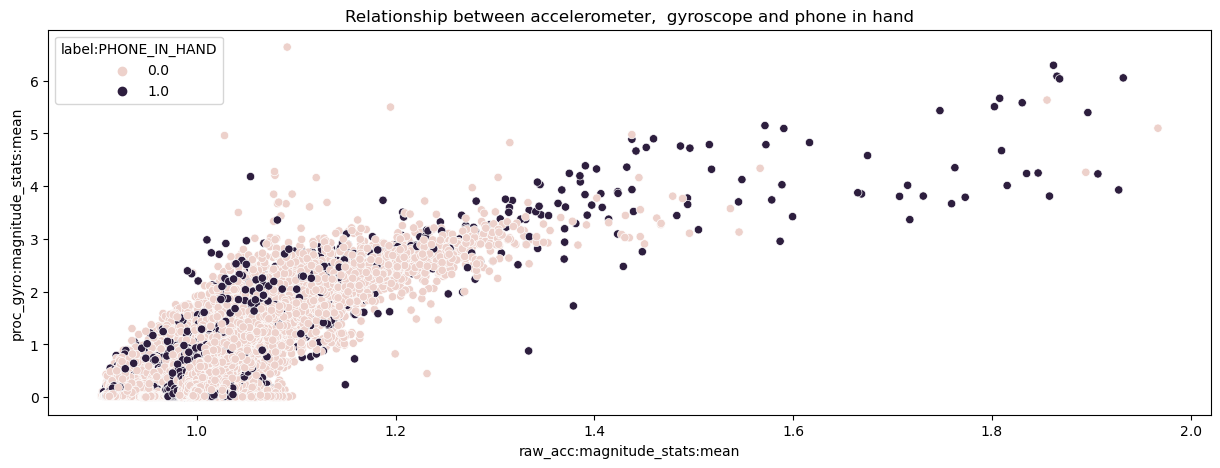

In [39]:
plt.figure(figsize=(15,5))
plt.title("Relationship between accelerometer,  gyroscope and phone in hand")
sn.scatterplot(x=data_final['raw_acc:magnitude_stats:mean'], y=data_final['proc_gyro:magnitude_stats:mean'], hue=data_final['label:PHONE_IN_HAND'])

There is a strong positive relationship between accelerometer and gyroscope. phone in hand has highest accelerometer values than phone not in hand.

<AxesSubplot:title={'center':'Relationship between accelerometer,  gyroscope and phone on table'}, xlabel='raw_acc:magnitude_stats:mean', ylabel='proc_gyro:magnitude_stats:mean'>

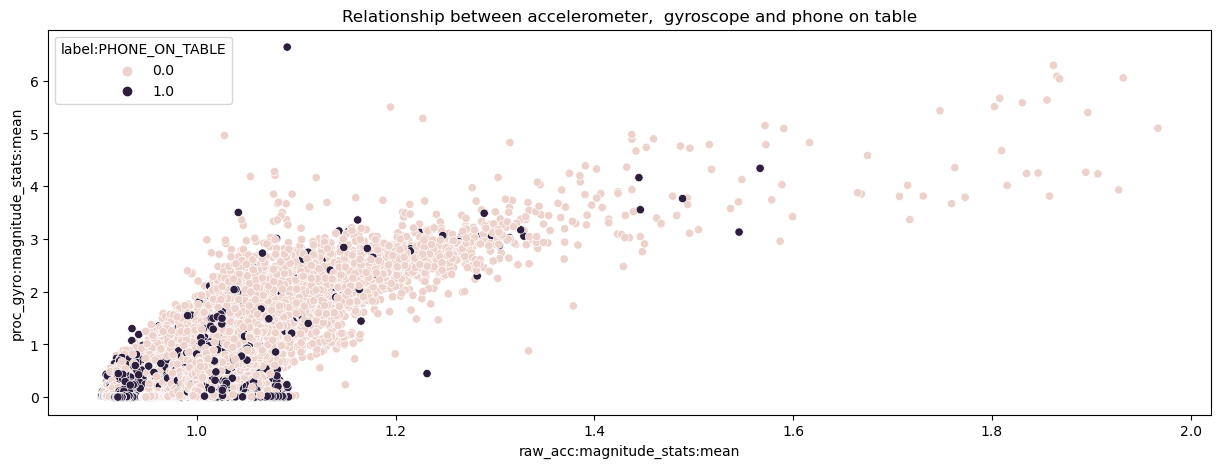

In [40]:
plt.figure(figsize=(15,5))
plt.title("Relationship between accelerometer,  gyroscope and phone on table")
sn.scatterplot(x=data_final['raw_acc:magnitude_stats:mean'], y=data_final['proc_gyro:magnitude_stats:mean'], hue=data_final['label:PHONE_ON_TABLE'])

There is a strong positive relationship between accelerometer and gyroscope. phone on table has low accelerometer values than phone not on table.

<AxesSubplot:title={'center':'Relationship between watch accelerometer, accelerometer, and sleeping'}, xlabel='watch_acceleration:magnitude_stats:mean', ylabel='raw_acc:magnitude_stats:mean'>

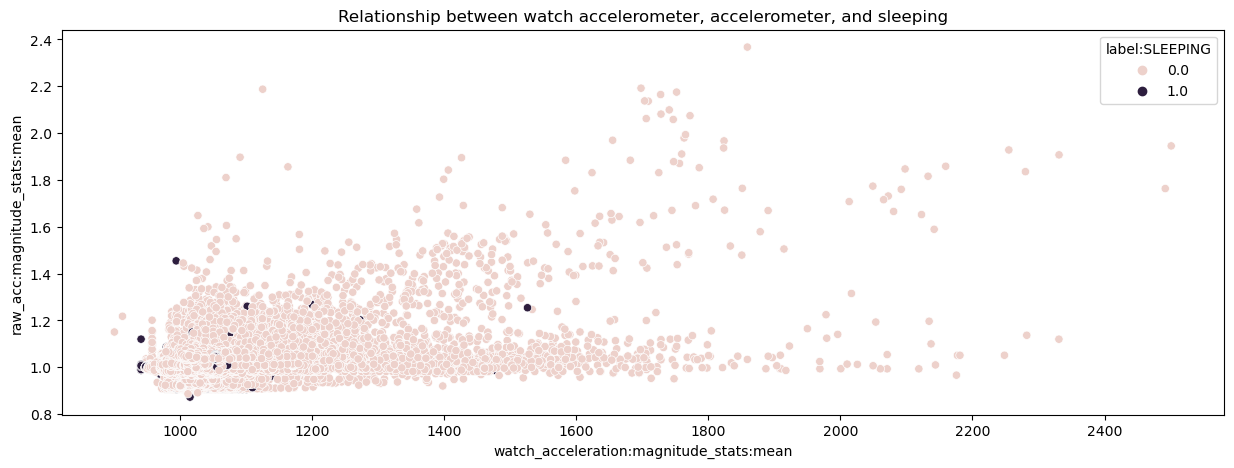

In [41]:
plt.figure(figsize=(15,5))
plt.title("Relationship between watch accelerometer, accelerometer, and sleeping")
sn.scatterplot(x=data_final['watch_acceleration:magnitude_stats:mean'], y=data_final['raw_acc:magnitude_stats:mean'], hue=data_final['label:SLEEPING'])

There is a low positive relationship between accelerometer and watch accelerometer. sleeping has low accelerometer and watch accelerator values not sleeping.

<AxesSubplot:title={'center':'Relationship between watch accelerometer, accelerometer, and running'}, xlabel='watch_acceleration:magnitude_stats:mean', ylabel='raw_acc:magnitude_stats:mean'>

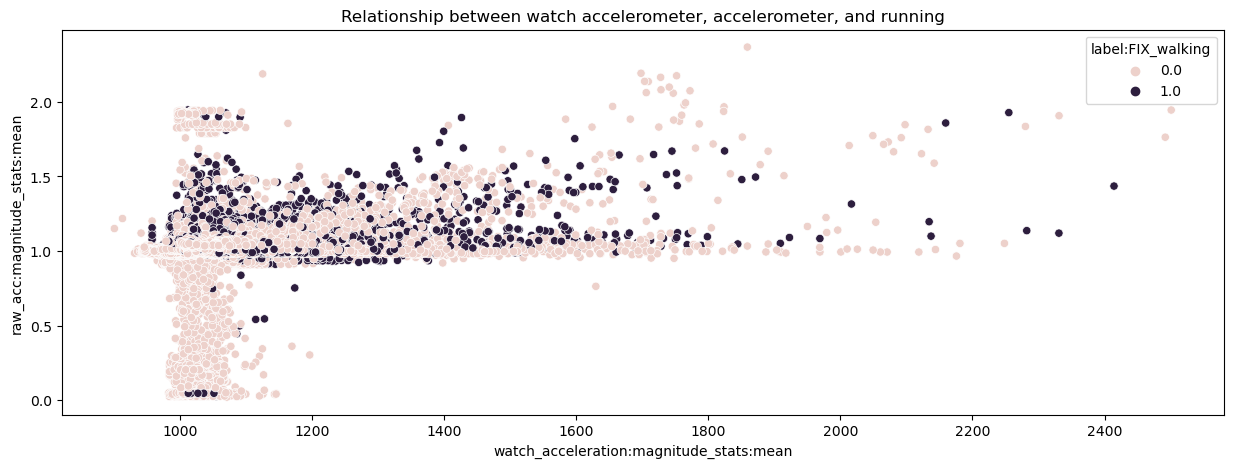

In [42]:
plt.figure(figsize=(15,5))
plt.title("Relationship between watch accelerometer, accelerometer, and running")
sn.scatterplot(x=data_final['watch_acceleration:magnitude_stats:mean'], y=data_final['raw_acc:magnitude_stats:mean'], hue=data_final['label:FIX_walking'])

There is a low positive relationship between accelerometer and watch accelerometer. walking has high accelerometer values than not walking.

<AxesSubplot:title={'center':'Relationship between location and indoors'}, xlabel='location:log_latitude_range', ylabel='location:log_longitude_range'>

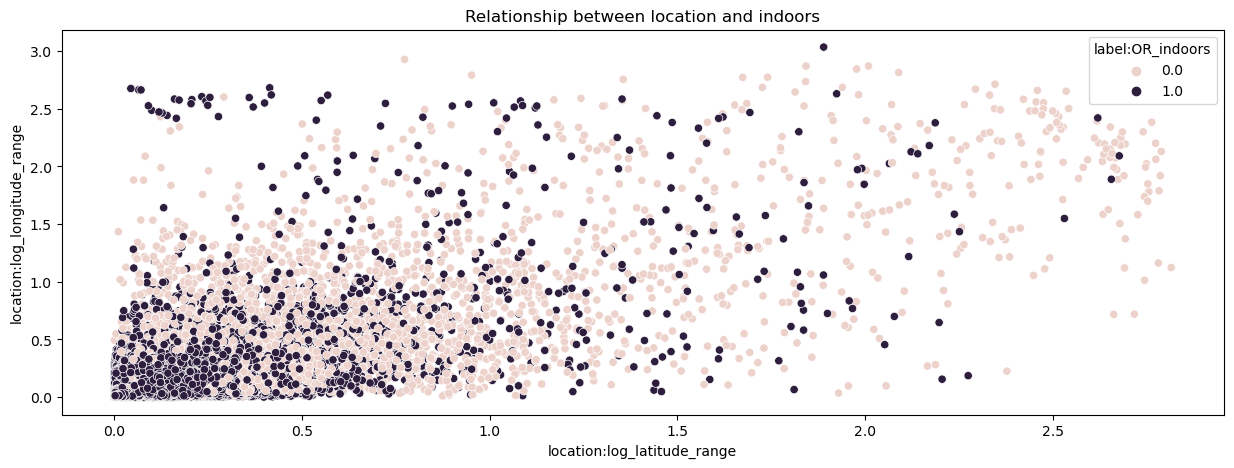

In [43]:
plt.figure(figsize=(15,5))
plt.title("Relationship between location and indoors")
sn.scatterplot(x=data_final['location:log_latitude_range'], y=data_final['location:log_longitude_range'], hue=data_final['label:OR_indoors'])

There is a positive relationship between location longitude and location latitude. indoors has low location range value than not indoors.

<AxesSubplot:title={'center':'Relationship between location and outside'}, xlabel='location:log_latitude_range', ylabel='location:log_longitude_range'>

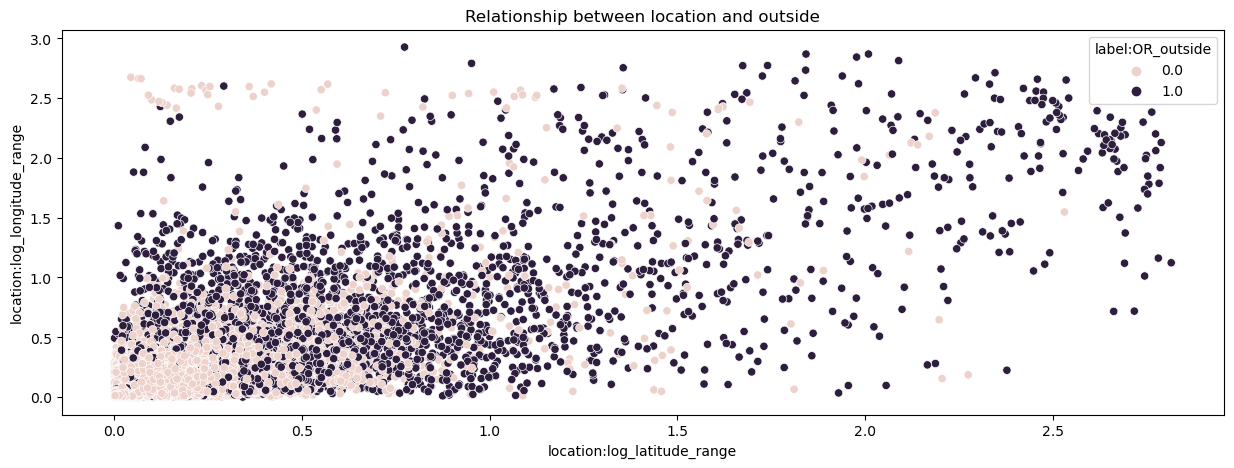

In [44]:
plt.figure(figsize=(15,5))
plt.title("Relationship between location and outside")
sn.scatterplot(x=data_final['location:log_latitude_range'], y=data_final['location:log_longitude_range'], hue=data_final['label:OR_outside'])

There is a positive relationship between location longitude and location latitude. outside has high location range value than not not outside.

### V- Machine Learning

For the machine learning part we are going to build multi-labels classification model. We are going to predict a set of label (running, walking, indoors, outside, home).

#### 1- Binary classification

#### Features and Labels Selection

these features will be used for our model: accelerometer, gyroscope, watch accelerometer,location.

These labels will be used for our model: label:PHONE_IN_HAND, label:PHONE_ON_TABLE, label:SLEEPING, label:FIX_running, label:FIX_walking, label:OR_indoors, label:OR_outside, label:LOC_home

In [45]:
def project_features_to_selected_sensors(feature_names,sensors_to_use):

    feature_names_arr = []
    for sensor in sensors_to_use:
        if sensor == 'Acc':
            for feature in feature_names:
                #print (type(feature))
                if (feature.startswith('raw_acc')):
                    feature_names_arr.append(feature)
        elif sensor == 'WAcc':
            for feature in feature_names:
                if (feature.startswith('watch_acceleration')):
                    feature_names_arr.append(feature)
        elif sensor == 'Gyro':
            for feature in feature_names:
                if (feature.startswith('proc_gyro')):
                    feature_names_arr.append(feature)
        elif sensor == 'Magnet':
            for feature in feature_names:
                if (feature.startswith('raw_magnet')):
                    feature_names_arr.append(feature)
        elif sensor == 'Compass':
            for feature in feature_names:
                if (feature.startswith('watch_heading')):
                    feature_names_arr.append(feature)
        elif sensor == 'Loc':
            for feature in feature_names:
                if (feature.startswith('location')):
                    feature_names_arr.append(feature)
        elif sensor == 'Aud':
            for feature in feature_names:
                if (feature.startswith('audio_naive')):
                    feature_names_arr.append(feature)
        elif sensor == 'AP':
            for feature in feature_names:
                if (feature.startswith('audio_properties')):
                    feature_names_arr.append(feature)
        elif sensor == 'PS':
            for feature in feature_names:
                if (feature.startswith('discrete')):
                    feature_names_arr.append(feature)
        elif sensor == 'LF':
            for feature in feature_names:
                if (feature.startswith('lf_measurements')):
                    feature_names_arr.append(feature)
                    
    return feature_names_arr

In [46]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc','WAcc','Loc'])
features_of_selected_sensors

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'watch_acceleration:magnitude_stats:mean',
 'watch_acceleration:magnitude_stats

In [47]:
label_list = ['label:PHONE_IN_HAND','label:PHONE_ON_TABLE','label:SLEEPING','label:FIX_running','label:FIX_walking','label:OR_indoors', 'label:OR_outside','label:LOC_home']

#### Filling Labels Null Values with Most Frequent Values

In [48]:
data_final[label_list] = data_final[label_list].apply(lambda x:x.fillna(x.value_counts().index[0]))
missing_data(data_final[label_list])

,Total,Percentage
label:PHONE_IN_HAND,0,0.0
label:PHONE_ON_TABLE,0,0.0
label:SLEEPING,0,0.0
label:FIX_running,0,0.0
label:FIX_walking,0,0.0
label:OR_indoors,0,0.0
label:OR_outside,0,0.0
label:LOC_home,0,0.0


#### Filling Features Null Values with mean

In [49]:
data_final[features_of_selected_sensors] = data_final[features_of_selected_sensors].fillna(data_final[features_of_selected_sensors].mean())
missing_data(data_final[features_of_selected_sensors])

,Total,Percentage
raw_acc:magnitude_stats:mean,0,0.0
watch_acceleration:3d:mean_z,0,0.0
watch_acceleration:spectrum:z_log_energy_band3,0,0.0
watch_acceleration:spectrum:z_log_energy_band2,0,0.0
watch_acceleration:spectrum:z_log_energy_band1,0,0.0
...,...,...
watch_acceleration:magnitude_stats:moment3,0,0.0
watch_acceleration:magnitude_stats:std,0,0.0
watch_acceleration:magnitude_stats:mean,0,0.0
raw_acc:3d:ro_yz,0,0.0


#### Split dataset into Train and Test Set

In [50]:
X = data_final[features_of_selected_sensors]
Y = data_final[label_list]

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)  

#### Bulding the model

In [52]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, classification_report


In [ ]:
model = LabelPowerset(RandomForestClassifier())
model.fit(X_train, Y_train)
predictions = model.predict(X_test) 
acc = accuracy_score(Y_test, predictions)
ham = hamming_loss(Y_test, predictions)
print(f"ACCURACY SCORE: {acc} | HAMMING LOSS: {ham}")

#### Predictions

In [ ]:
predictions.toarray()

#### Model Evaluation

In [ ]:
# Accuracy
acc

In [ ]:
# Hamming Loss

In [ ]:
ham